# Finding a Rotation Matrix 

Lets consider we have a vector <b> X[5, 5] </b> at an angle of <b> A  </b> whose length is <b> R </b>. As shown below:

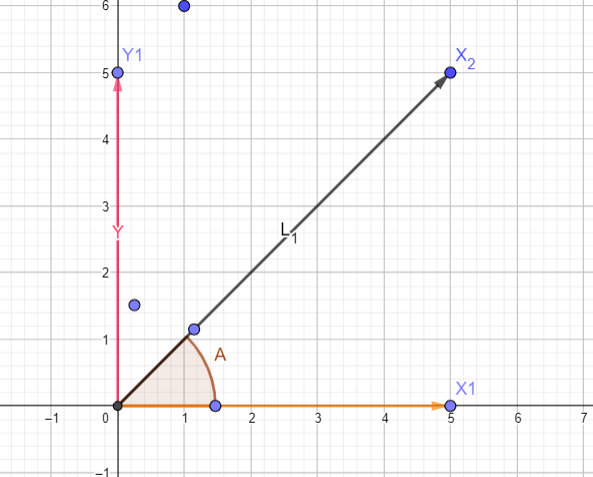

Now lets rotate the vector aticlockwise with an angle of <b> B </b> in addition to existing <b> A </b> keeping the length of vector same.
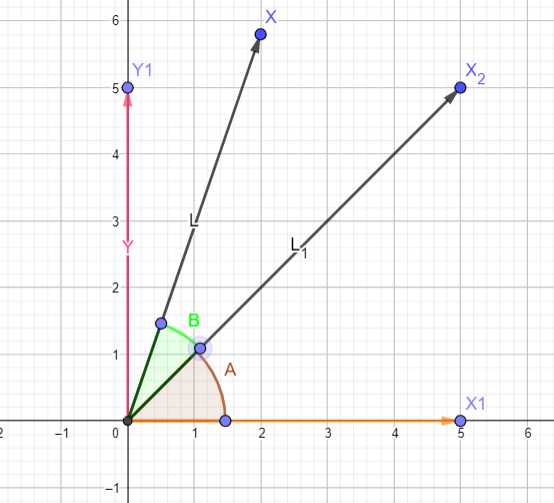

Now lets find the <b> X1 </b> and <b> Y1 </b> value for our first vector given the angle <b> A </b> 
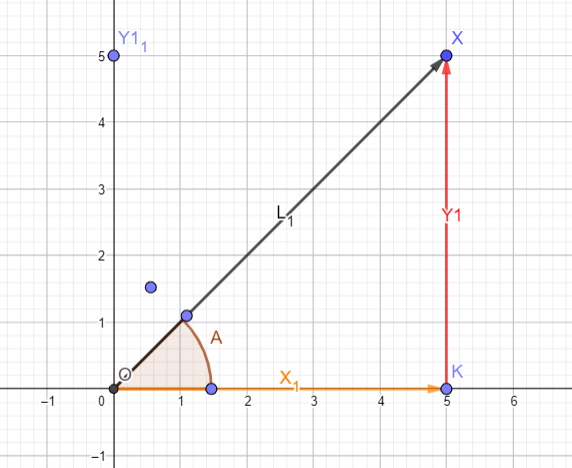

From trignometric function we know that :
 
   $$Sin(A) = \frac{Opposite}{hypotenuse}$$
   
   and 
   $$Cos(A) = \frac{Adjacent}{hypotenuse}$$


From above triangle <b> OXK </b>:
   $$\text {Y1 = L Sin(A)          ---- (1) } $$
   
   $$\text {X1 = L Cos(A)          ---- (2) }$$ 


Now considering the second triangle <b>OCX</b>:
    $$Y2 = L Sin(A+B)  --(3) $$

$$X2 = L Cos(A+B)  --(4) $$
   
Now substitute the trignometric expansion of <b> Sin(A+B)</b> and <b>Cos(A+B) </b>


i.e 
    $$Sin(A+B) = SinA CosB + CosA SinB $$ \
    $$Cos(A+B) = CosA CosB - SinA SinB $$ \
    
    
Substitute above equation in <b> (3) </b> and <b> (4) </b> 
     $$ \text   { Y2 = L( SinA CosB + CosA SinB )} $$ \
       $$ \text {    = L SinA CosB + LCosA SinB} $$ \
       $$ \text {    = Y1 CosB + X1 SinB   -> From equation (1) and (2) }$$ 


Similarly :
  
  $$ \text { X2 = L (CosA CosB - SinA SinB) } $$ \
   $$ \text { = L CosA CosB - L SinA SinB }$$ \
    $$ \text {  = X1 CosB - Y1 SinB --> From equation (1) and (2)} $$ 


So final Equation for new X2 and Y2 can be written as :
 
 $$\text { Y2 = Y1 CosB + X1 SinB}$$ 
 
 
 $$ \text {X2 = X1 CosB - Y1 SinB } $$ 


So  X2 and Y2 are the new position of vector X[5,5]
We can write above two equations in a metrix form as shown below : 

$$
\
\begin{bmatrix}
\ X2 \\
\ Y2 \\
\end{bmatrix}
=
\begin{bmatrix}
\ Cos(B) & 
\ -Sin(B) \\
\ Sin(B) & 
\ Cos(B)
\end{bmatrix}
\
\begin{bmatrix}
\ X1 \\
\ Y1 \\
\end{bmatrix}
$$

In below function we will use the same matrix to find the every pixel position after rotating the angle of B

Enter the rotation angle :- 200


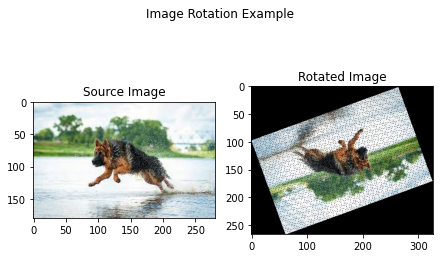

In [59]:
import numpy as np
import math 
from PIL import Image
import matplotlib.pyplot as plt

def Rotate_Image(img,angle):
    Input_height = img.shape[0]
    Input_width = img.shape[1]
    Input_dims = img.shape[2]

    angle=math.radians(angle)   
    cosine=math.cos(angle)
    sine=math.sin(angle)

    # Y1 = Y0 Cos(Theta) + x0 Sin(Theta)
    Output_height = round(abs(Input_height*cosine) + abs(Input_width*sine))+1

    # X1 = x0 Cos(Theta) + Y0 Sin(Theta)
    Output_width = round(abs(Input_width*cosine)+abs(Input_height*sine))+1

    # Create an empty  image
    Output_Image = np.zeros((Output_height,Output_width,Input_dims),dtype=np.uint8)

    # Find center of original image
    Input_center_height = round((Input_height+1)/2)
    Input_center_width = round((Input_width+1)/2)

    # Find the center of the  new image on which rotated points are drwan 
    output_canter_height = round((Output_height+1)/2)
    output_canter_width = round((Output_width+1)/2)

    for i in range(Input_height):
        for j in range(Input_width):

            #co-ordinates of pixel with respect to the centre of original image
            y=Input_height-1-i-Input_center_height                   
            x=Input_width-1-j-Input_center_width                      

            #co-ordinate of pixel with respect to the rotated image
            new_y=round(-x*sine+y*cosine)
            new_x=round(x*cosine+y*sine)

            '''since image will be rotated the centre will change too, 
               so to adust to that we will need to change new_x and new_y with respect to the new centre'''
            new_y=output_canter_height-new_y
            new_x=output_canter_width-new_x

            # adding if check to prevent any errors in the processing
            if 0 <= new_x < Output_width and 0 <= new_y < Output_height and new_x>=0 and new_y>=0:
                Output_Image[new_y,new_x,:]=img[i,j,:]
    
    return Output_Image

# Read Image
img = np.array(Image.open(".\\Dog.jpg"))

# Get Angle from user
angle=int(input("Enter the rotation angle :- "))

# Rotate Image
rotated_img = Rotate_Image(img,angle)


figure, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True)
figure.suptitle("Image Rotation Example")

# Plot Source image
axes[0].imshow(img)
axes[0].title.set_text('Source Image')

# Plot Source image
axes[1].imshow(rotated_img)
axes[1].title.set_text('Rotated Image')

plt.show()